In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 8)

In [29]:
df = pd.read_excel('data/Sleep_Dataset.xlsx')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Descriptive Analytics

The dataset consists of 374 records and 13 columns:

- **Person ID:** int | person unique identifier

- **Gender:** str | gender of the person (Male, Female)

- **Age:** int | age of the person (range 27-58)

- **Occupation:** str | job of the person (Software Engineer, Doctor, Sales Representative,Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager)

- **Sleep Duration:** float | length of sleep period (I am assuming h/day)

- **Quality of Sleep:** int | quality sleep grade (range 4-9)

- **Physical Activity Level:** int | level of physical activity of the person (I am assuming min/day)

- **Stress Level:** int | stress level of the person (range 3-8)

- **BMI Category:** str | BMI category of the person (Normal, Normal weight, Overweight, Obese)

- **Blood Pressure:** str | the blood pressure measurement of the person (126/83, 125/80, 140/90, 120/80, 132/87, 130/86,117/76, 118/76, 128/85, 131/86, 128/84, 115/75,135/88, 129/84, 130/85, 115/78, 119/77, 121/79,125/82, 135/90, 122/80, 142/92, 140/95, 139/91, 118/75)

- **Heart Rate:** int | the heart rate measurement of the person (range 65-86)

- **Daily Steps:** int | the daily steps walked by the person (range 3000-10000)

- **Sleep Disorder:** str | the sleep disorder of the person (None, Sleep Apnea, Insomnia)


In [30]:
# changing the data type of Personal ID

df[['Person ID']] = df[['Person ID']].astype(str)
df['Sleep Disorder'].fillna('None', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    object 
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 29.3+ KB


In [31]:
# descriptive analytics of numerical columns

df.describe()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000



 Gender


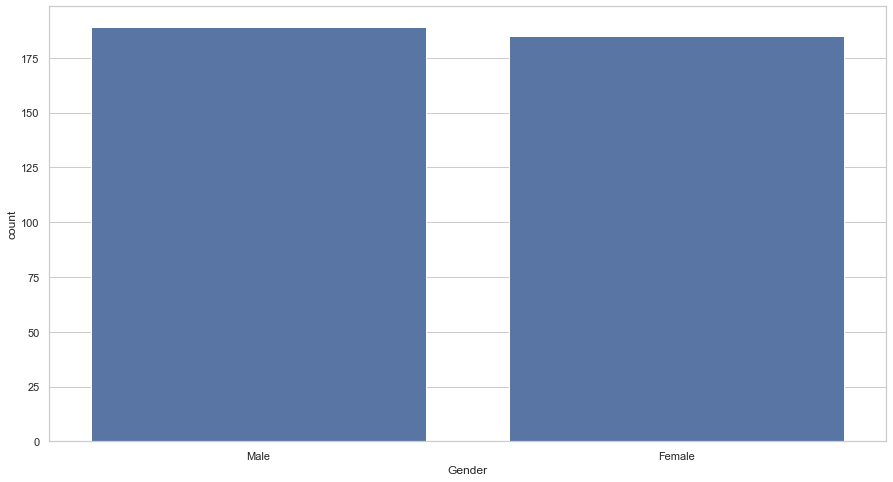


 Age


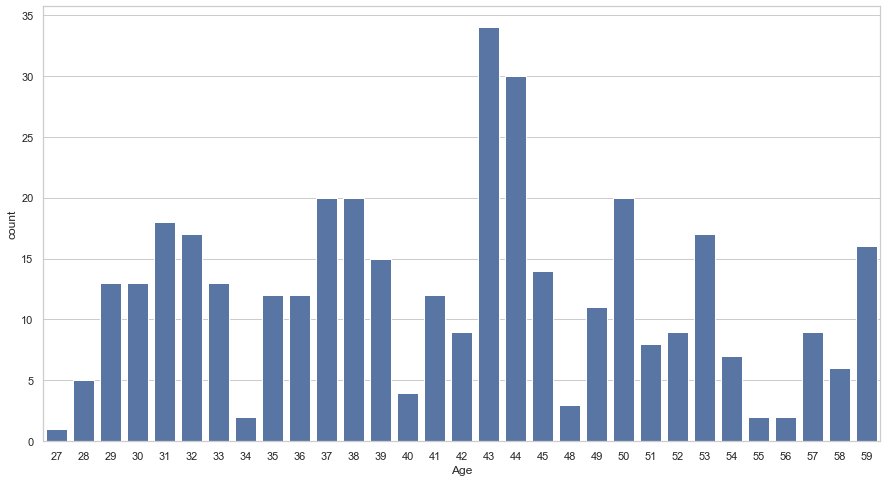


 Occupation


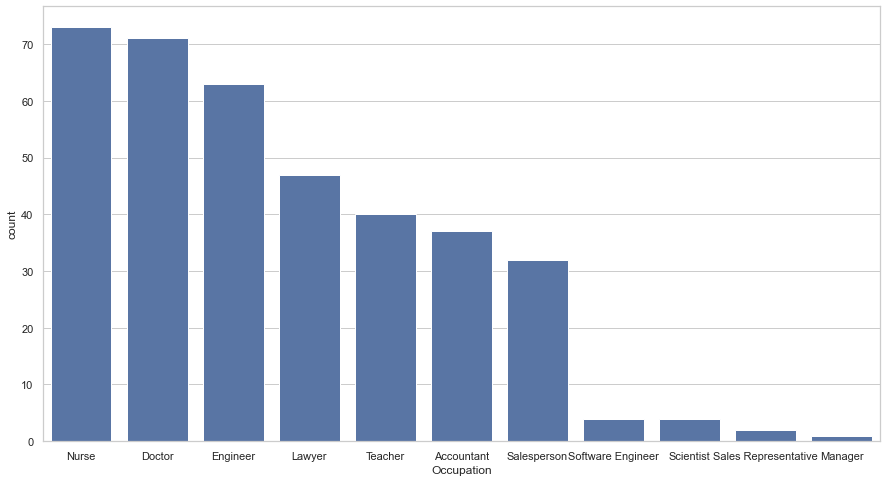


 Sleep Duration


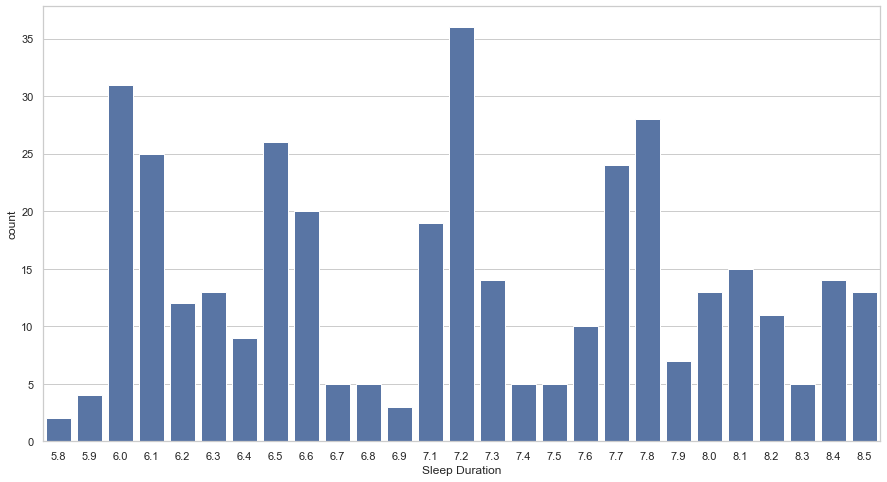


 Quality of Sleep


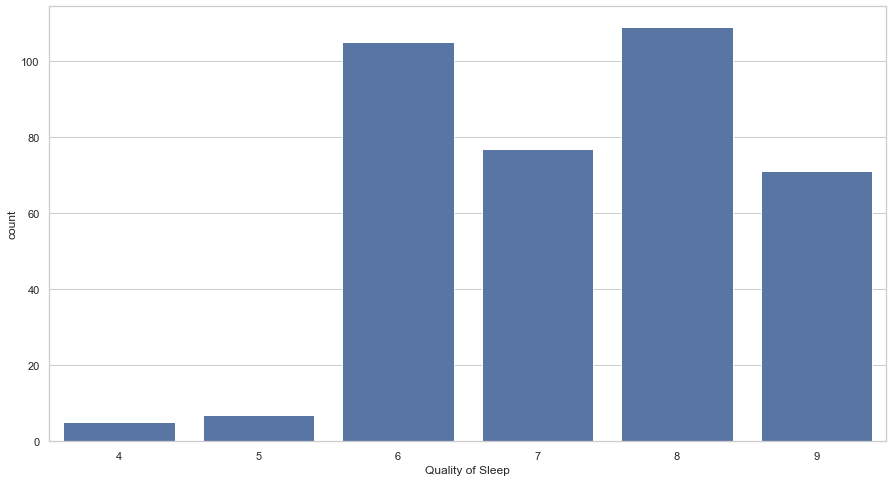


 Physical Activity Level


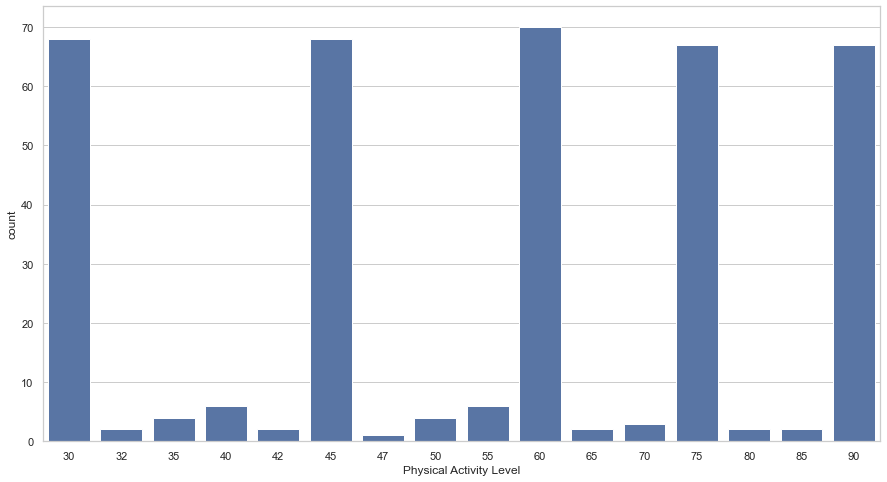


 Stress Level


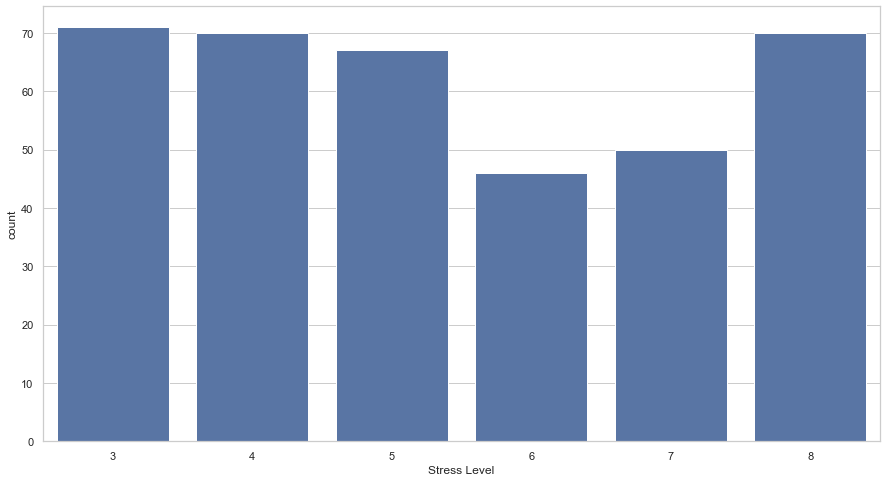


 BMI Category


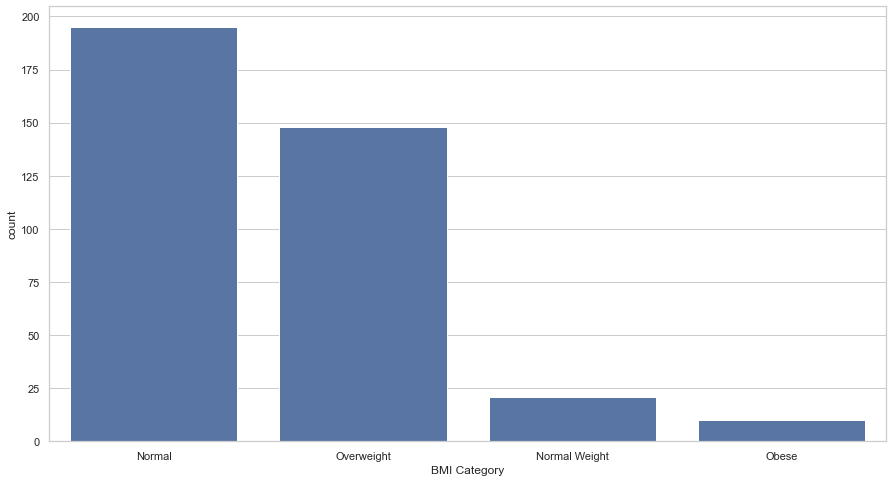


 Blood Pressure


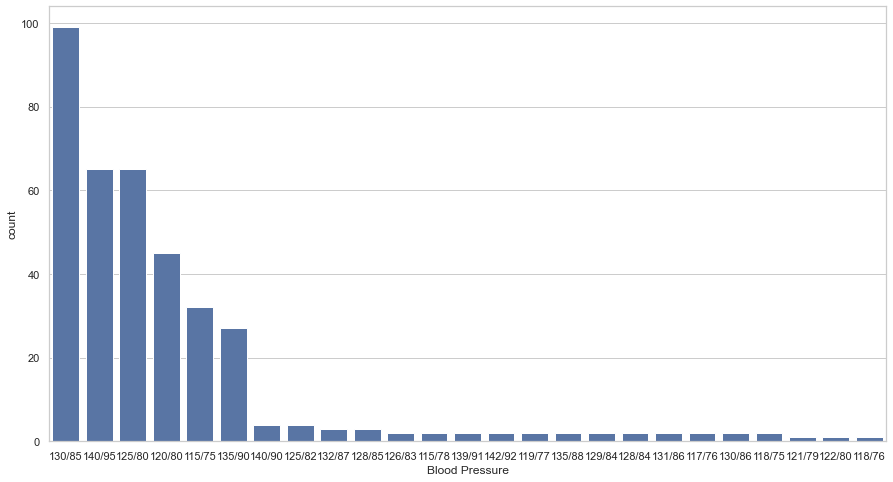


 Heart Rate


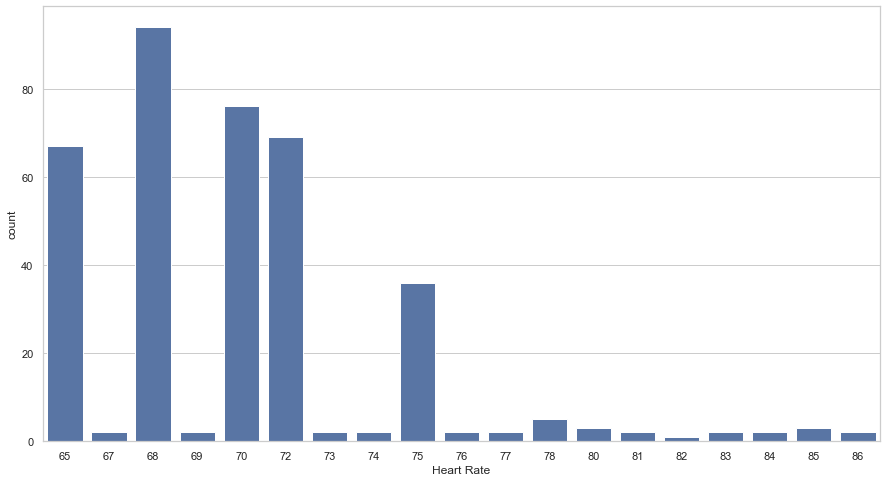


 Daily Steps


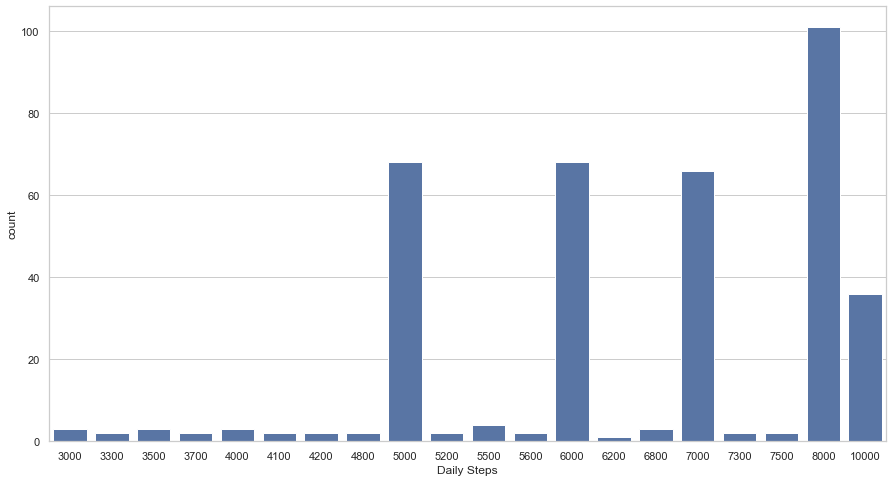


 Sleep Disorder


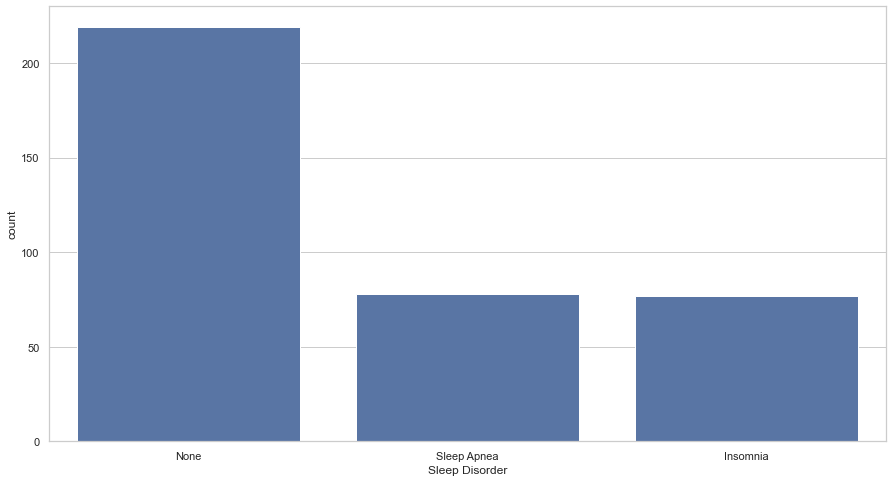

In [32]:
# visualizing the distribution of each data field

for col in df.columns[1:]:
    val_counts = df[col].value_counts().reset_index()
    print('\n {}'.format(col))
    sns.barplot(x=val_counts[val_counts.columns[0]], y=val_counts[val_counts.columns[1]], color='b')
    plt.show()
    

In [33]:
# creating the higher-level grouping for Age and BMI category

df['Age Label'] = np.where(df['Age']<35,'1-Young Adult',
                            np.where(df['Age']<50,'2-Adult','3-Old Adult'))

df['BMI Group'] = np.where(df['BMI Category']=='Normal Weight', 'Overweight',
                           np.where(df['BMI Category']=='Obese', 'Overweight',df['BMI Category']))

# Data Quality / Data Validation / Data Cleaning

**What information about the existing data elements would be helpful to better interpret this dataset?**

Despite being inferable from the values, *"Physical Activity Level"* and *"Sleep Duration"* columns require confirmation on the unit metric. Similarly, *"Quality of Sleep"* and *"Stress Level"* need validation on the complete value range available.

**What would be your approach to learning more about the data elements?(b)**

To learn more about the data elements, I would go to the data source (website, data manager...) and inquire about the collection process.

**Would you recategorize or reformat any variables prior to analysis?**

- I have created a higher-level label for *"Age"* and *"BMI Category"* to better visualize the data element, especially in aggregations.
- I have reformated the *"Physical Level Activity"*, *"Quality of Sleep"*, *"Sleep Duration"*, and *"Stress Level"* columns, introducing jitter due to the overlapping values

**Is there any data that doesn't make sense intuitively? Identify any red flags in the data that may indicate a quality issue.**

- *"BMI Category"* has two categories that look identical (*"Normal"* and *"Normal weight"*) and should be merged.
- *"Occupation"* has two values that look identical (*"Salesperson"* and *"Sales Representative"*) and should be merged.
- *"Age"* has no values before age = 27 and between age = 45 and age = 48; it might be a collection/pipeline issue.
- *"Quality of Sleep"* has very few values, 4 and 5 occurrences. More data is needed to understand what drives low-quality sleep.

# Data Visualization

![Image](static/reg_scatter2.png)

- As shown in the <u>left side plot</u>, stress is a significant factor in poor sleep. Indeed, there is an inverse correlation between Quality of Sleep and Stress Level for both men and women. Interestingly, women seem to be more stressed than men overall.
- The <u>right side plot</u> illustrates the positive correlation between Quality of Sleep and Duration of Sleep, again shared by men and women. Also here, women tend to experience shorter and poorer sleep than men overall.

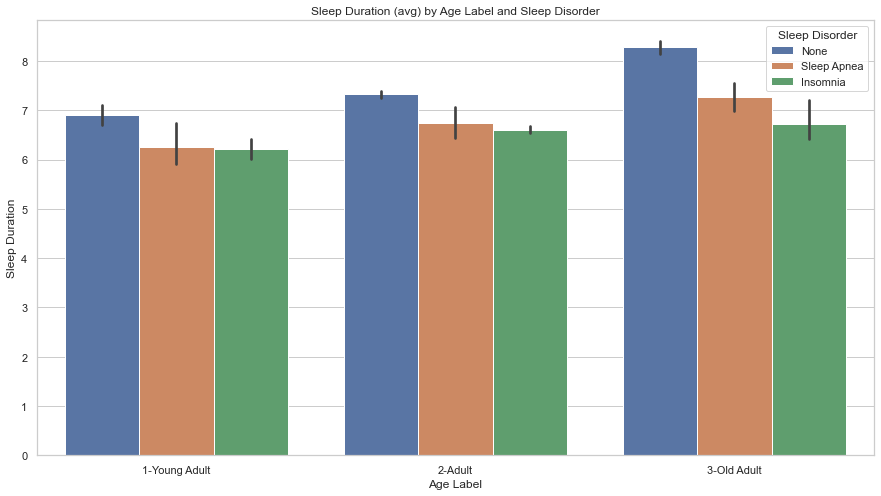

In [77]:
sns.barplot(x='Age Label', y='Sleep Duration', hue='Sleep Disorder', data=df)

plt.title('Sleep Duration (avg) by Age Label and Sleep Disorder');

*Sleep Duration* varies across different age categories. Younger people seem to sleep less overall. Sleeping disorders are seemingly more common in older people and impair sleep at any age.

In [71]:
#Filtering out poorly represented categories
df_occ = df[(df['Occupation']!='Software Engineer') &
            (df['Occupation'] != 'Sales Representative') &
            (df['Occupation']!='Manager') &
            (df['Occupation'] != 'Scientist')]


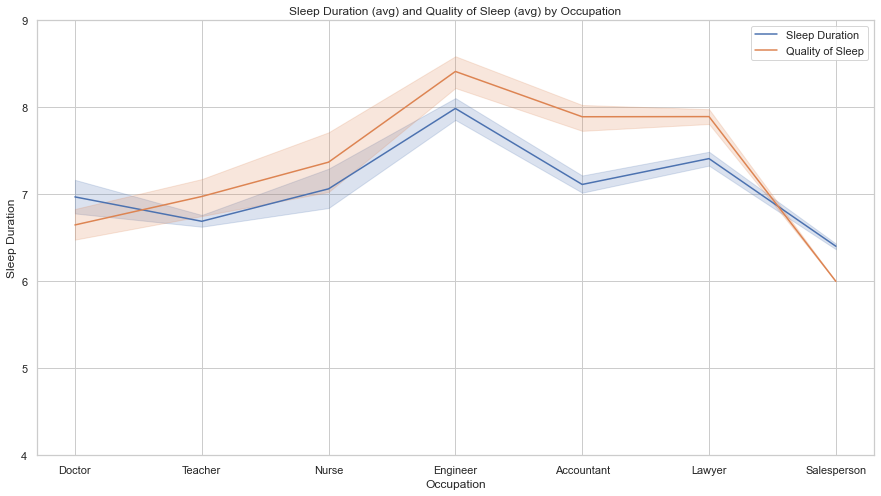

In [79]:
x_order = ['Engineer', 'Lawyer', 'Accountant','Nurse', 'Doctor', 'Teacher', 'Salesperson']

sns.lineplot(x='Occupation', y='Sleep Duration', label='Sleep Duration', data=df_occ, sort=True)
sns.lineplot(x='Occupation', y='Quality of Sleep', label='Quality of Sleep', data=df_occ)

plt.ylim(4,9)
plt.legend()
plt.title('Sleep Duration (avg) and Quality of Sleep (avg) by Occupation');

Similar trends in *Quality of Sleep* and *Duration of Sleep* across several professions, reinforcing that the longer you sleep, the better you sleep.

![Image](static/reg_scatter.png)

Positive correlation between physical activity and sleep duration. Also, it illustrates how weight is not a negative factor if you exercise. Notably, the two clusters in the upper-left and bottom-right of the plot represent normal-weight and overweight women, respectively. Further investigation of those two clusters would be needed to understand why they separate from the overall trends.

# Reccomendations

**What recommendations would you make for someone developing a program to help participants get better sleep?**

- The program should include activities to reduce stress, promote an active lifestyle, and encourage participants to prioritize at least 8 hours of sleep.

**What additional data would you be interested in collecting for further analysis?**

- I would like to collect nutrition, coffee/tea/energy drink consumption, and smoking data.

**What recommendations would you make to improve data collection in the future?**

- Make sure that each value of a data element has enough occurrences. 
For instance, "Manager" in the "Occupation" column has only one occurrence. Using higher-level grouping can solve this issue; however, it also reduces the granularity of the data.
